In [2]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import numpy as np
import wave
plt.rcParams['figure.figsize']=[20,4]
plt.rcParams.update({'font.size':20})

In [6]:
base="../Audio Data/"
sound_file = "adish_alap_aroh_b1.wav"
alap1 = "alap1.wav"
alap2 = "alap2.wav"
alap3 = "alap3.wav"
alap4 = "alap4.wav"
alap5 = "alap5.wav"
alap6 = "alap6.wav"
alap7 = "alap7.wav"
alap8 = "alap8.wav"
alap9 = "alap9.wav"
alap10 = "alap10.wav"
alap11 = "alap11.wav"
alap12 = "alap12.wav"

In [7]:
a=base+sound_file
a1=base+alap1
a2=base+alap2
a3=base+alap3
a4=base+alap4
a5=base+alap5
a6=base+alap6
a7=base+alap7
a8=base+alap8
a9=base+alap9
a10=base+alap10
a11=base+alap11
a12=base+alap12


In [8]:
ipd.Audio(a)

In [9]:
ipd.Audio(a1)

In [10]:
ipd.Audio(a2)

In [38]:
ipd.Audio(a3)

In [39]:
ipd.Audio(a4)

In [40]:
ipd.Audio(a5)

In [41]:
ipd.Audio(a6)

In [42]:
ipd.Audio(a7)

In [43]:
ipd.Audio(a8)

In [44]:
ipd.Audio(a9)

In [45]:
ipd.Audio(a10)

In [46]:
ipd.Audio(a11)

In [47]:
ipd.Audio(a12)

In [11]:
voice, sr = librosa.load(a)
voice1, _ = librosa.load(a1)
voice2, _ = librosa.load(a2)
voice3, _ = librosa.load(a3)
voice4, _ = librosa.load(a4)
voice5, _ = librosa.load(a5)
voice6, _ = librosa.load(a6)
voice7, _ = librosa.load(a7)
voice8, _ = librosa.load(a8)
voice9, _ = librosa.load(a9)
voice10, _ = librosa.load(a10)
voice11, _ = librosa.load(a11)
voice12, _ = librosa.load(a12)

Text(0.5, 1.0, 'Time Domain')

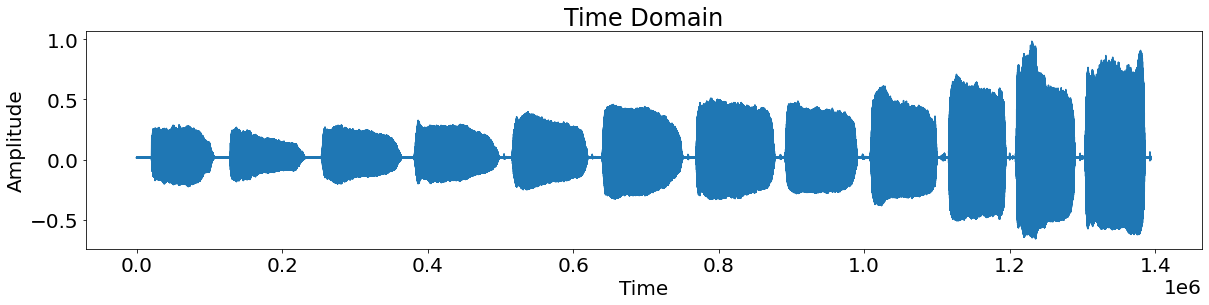

In [12]:
plt.plot(voice)
plt.xlabel('Time') 
plt.ylabel('Amplitude')
plt.title('Time Domain')

In [13]:
def limitFreq(freq,size):
    for i,j in enumerate(freq):
        if j>size:
            return i
            break
def remove_till_limit(Xaxis,limit,maxBins):
    newX=[]
    for i in Xaxis[:maxBins]:
        if i<limit:
            newX.append(0)
        else:
            newX.append(i)
    return newX
def getFundamental(Xaxis,bins):
    for i,j in enumerate(Xaxis[1:bins]):
        if j>0:
            return i

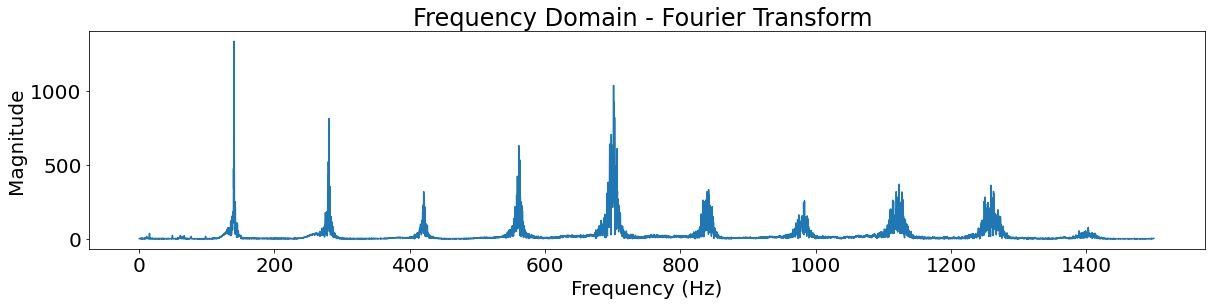

In [14]:
n=len(voice1)
X = np.fft.fft(voice1)
X_mag1 = np.absolute(X)
f1 = np.linspace(0, sr, len(X_mag1))
f_bins1=limitFreq(f1,1500)
plt.plot(f1[1:f_bins1], X_mag1[1:f_bins1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain - Fourier Transform ')
plt.show()   

In [15]:
newX_mag1=remove_till_limit(X_mag1,500,f_bins1)

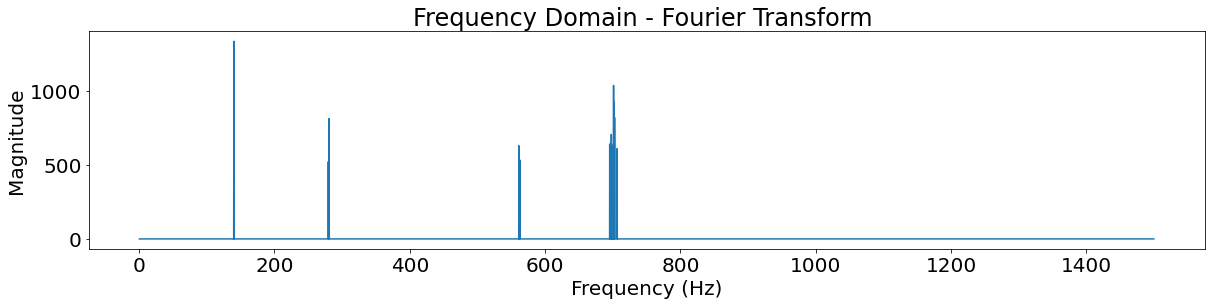

In [16]:
plt.plot(f1[1:f_bins1], newX_mag1[1:f_bins1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain - Fourier Transform ') 
plt.show()  

In [17]:
print(f"Fundamental Frequency(Pitch) is {round(f1[getFundamental(newX_mag1,f_bins1)])} Hz") 

Fundamental Frequency(Pitch) is 140 Hz


Text(0.5, 1.0, 'Power Spectrum')

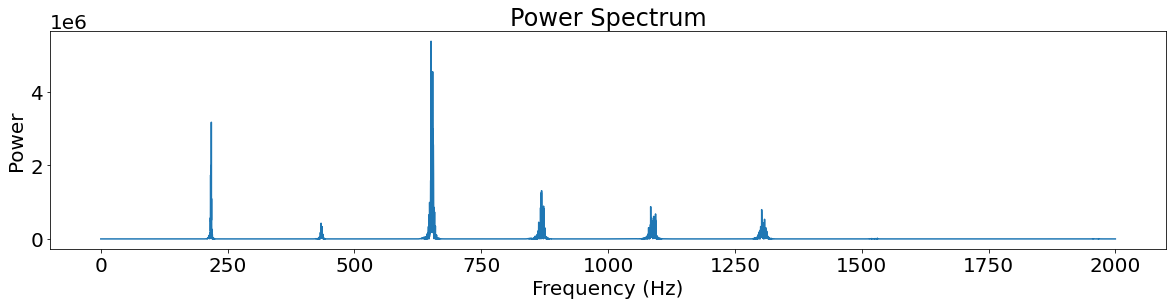

In [18]:
X = np.fft.fft(voice6)
X_mag = np.absolute(X)
power_spectrum = np.square(X_mag)
f = np.linspace(0, sr, len(power_spectrum))
f_bins=limitFreq(f,2000)
plt.plot(f[1:f_bins], power_spectrum[1:f_bins])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power Spectrum')

# Using Crepe library

In [69]:
import pandas as pd

In [14]:
df=pd.read_csv(base+'violin-C4.f0.csv')

In [15]:
pitch=df[df.confidence>0.90]

In [16]:
print("Pitch is :",pitch.frequency.mean())

Pitch is : 261.7202058823529
